In [30]:
from pathlib import Path

import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [31]:
df = pd.read_json("exps.jsonl", lines=True)
print(len(df))
df.head()

73


,id,name,params.dataset.path,params.dataset.name,params.dataset.split,params.qa.model,params.qa.temperature,params.qa.system_prompt,params.qa.user_prompt_template,params.qa.few_shot_examples,...,metrics.gen_token_count.success.max,metrics.gen_token_count.fail.count,metrics.gen_token_count.fail.mean,metrics.gen_token_count.fail.std,metrics.gen_token_count.fail.min,metrics.gen_token_count.fail.25%,metrics.gen_token_count.fail.50%,metrics.gen_token_count.fail.75%,metrics.gen_token_count.fail.max,params.qa.technique
0,ac87fe2eebbc7146d2d68972528f2877cb74ae4a,dotty-goaf,bdsaglam/musique-sweep,answerable,train,llama-3-70b-tgi,0.1,direct/format-few.txt,cq.txt,semi/direct.json,...,12,113,5.469027,3.753738,0,3.00,5.0,7.00,18,DIRECT
1,36c497854a5c6e5648987ce4bec5ea806b59798c,muley-mine,bdsaglam/musique-sweep,answerable,train,llama-3-70b-tgi,0.7,direct/format-few.txt,cq.txt,semi/direct.json,...,13,98,6.459184,3.005728,3,4.00,6.0,8.00,18,DIRECT
2,03a8e2902d22e045fc4f7da6d0eb8e8dda9b8425,total-pice,bdsaglam/musique-sweep,answerable,train,llama-3-70b-tgi,0.1,cte/format-triples-ere-few.txt,cq.txt,semi/cte-triples.json,...,90,100,39.090000,19.311950,1,28.75,38.0,47.25,83,CTE
3,5094d4d2e51f81bd653812b1407ee500a8d9b80b,woven-nowt,bdsaglam/musique-sweep,answerable,train,llama-3-70b-tgi,0.7,cte/format-triples-ere-few.txt,cq.txt,semi/cte-triples.json,...,137,74,46.567568,17.719335,24,33.00,42.5,57.50,106,CTE
4,0593d2203c83475af9ef8b0e4feeeefae6814f10,yucky-vans,bdsaglam/musique-sweep,answerable,train,llama-3-70b-tgi,0.1,cte/format-triples-few.txt,cq.txt,semi/cte-triples.json,...,139,231,66.666667,470.327154,0,13.00,29.0,49.00,7167,CTE


In [32]:
param_cols = [col for col in df.columns if col.startswith("params.")]
metric_cols = [col for col in df.columns if col.startswith("metrics.")]
df.drop(
    columns=[
        "id",
        "params.dataset.path",
        "params.dataset.name",
        "params.dataset.split",
        "params.qa.model",
    ],
    inplace=True,
)

In [33]:
target_param_cols = [
    "params.qa.technique",
    "params.qa.system_prompt",
    "params.qa.few_shot_examples",
    "params.qa.n_shot",
    "params.qa.n_sc",
    "params.qa.temperature",
]
df = df.sort_values(target_param_cols + ["params.run"])
df.reset_index(drop=True, inplace=True)
df.head()

,name,params.qa.temperature,params.qa.system_prompt,params.qa.user_prompt_template,params.qa.few_shot_examples,params.qa.n_shot,params.qa.n_sc,params.run,metrics.exact_match,metrics.f1,...,metrics.gen_token_count.success.max,metrics.gen_token_count.fail.count,metrics.gen_token_count.fail.mean,metrics.gen_token_count.fail.std,metrics.gen_token_count.fail.min,metrics.gen_token_count.fail.25%,metrics.gen_token_count.fail.50%,metrics.gen_token_count.fail.75%,metrics.gen_token_count.fail.max,params.qa.technique
0,blame-dook,0.0,ccot/format-thought.txt,cq.txt,semi/ccot.json,0,1,1,0.633333,0.736454,...,96,82,49.048780,15.696899,23,39.25,46.5,57.0,97,CCOT
1,jaggy-jynx,0.0,ccot/format-thought.txt,cq.txt,semi/ccot.json,1,1,1,0.636667,0.732997,...,90,80,49.387500,20.153521,5,37.00,46.5,60.5,100,CCOT
2,stout-iron,0.5,ccot/format-thought.txt,cq.txt,semi/ccot.json,1,1,1,0.120000,0.156711,...,85,254,30.051181,11.814163,13,24.25,28.0,31.0,93,CCOT
3,fancy-noil,0.5,ccot/format-thought.txt,cq.txt,semi/ccot.json,2,1,1,0.663333,0.760960,...,89,71,50.985915,18.009912,11,39.00,47.0,61.5,109,CCOT
4,piano-kegs,1.0,ccot/format-thought.txt,cq.txt,semi/ccot.json,2,1,1,0.170000,0.228703,...,133,237,31.915612,27.211998,1,15.00,24.0,42.0,156,CCOT


In [34]:
run_counts = df.groupby(target_param_cols)["params.run"].aggregate(tuple).reset_index()
mask = run_counts["params.run"].map(len) != 3
run_counts.loc[mask]

,params.qa.technique,params.qa.system_prompt,params.qa.few_shot_examples,params.qa.n_shot,params.qa.n_sc,params.qa.temperature,params.run
0,CCOT,ccot/format-thought.txt,semi/ccot.json,0,1,0.0,"(1,)"
1,CCOT,ccot/format-thought.txt,semi/ccot.json,1,1,0.0,"(1,)"
2,CCOT,ccot/format-thought.txt,semi/ccot.json,1,1,0.5,"(1,)"
3,CCOT,ccot/format-thought.txt,semi/ccot.json,2,1,0.5,"(1,)"
4,CCOT,ccot/format-thought.txt,semi/ccot.json,2,1,1.0,"(1,)"
...,...,...,...,...,...,...,...
68,DIRECT,direct/format-few.txt,semi/direct.json,2,1,1.0,"(1,)"
69,DIRECT,direct/format-few.txt,semi/direct.json,3,1,0.0,"(1,)"
70,DIRECT,direct/format-few.txt,semi/direct.json,3,1,0.5,"(1,)"
71,DIRECT,direct/format-few.txt,semi/direct.json,3,1,0.7,"(1,)"


In [35]:
def remove_ext(filename):
    return filename.split(".", 1)[0]

df["params.qa.system_prompt"] = df["params.qa.system_prompt"].map(remove_ext)
df["params.qa.user_prompt_template"] = df["params.qa.user_prompt_template"].map(remove_ext)
df["params.qa.few_shot_examples"] = df["params.qa.few_shot_examples"].map(remove_ext)

In [36]:
df['params.qa.system_prompt'].unique()

array(['ccot/format-thought', 'cok/adapted', 'cot/format-thought',
       'cte/format-triples-ere-few', 'cte/format-triples-few',
       'direct/format-few'], dtype=object)

In [37]:
avg_df = df.groupby(target_param_cols)[metric_cols].max().reset_index()
avg_df.head()

,params.qa.technique,params.qa.system_prompt,params.qa.few_shot_examples,params.qa.n_shot,params.qa.n_sc,params.qa.temperature,metrics.exact_match,metrics.f1,metrics.2hops.exact_match,metrics.2hops.f1,...,metrics.gen_token_count.success.75%,metrics.gen_token_count.success.max,metrics.gen_token_count.fail.count,metrics.gen_token_count.fail.mean,metrics.gen_token_count.fail.std,metrics.gen_token_count.fail.min,metrics.gen_token_count.fail.25%,metrics.gen_token_count.fail.50%,metrics.gen_token_count.fail.75%,metrics.gen_token_count.fail.max
0,CCOT,ccot/format-thought,semi/ccot,0,1,0.0,0.633333,0.736454,0.70,0.817960,...,52.00,96,82,49.048780,15.696899,23,39.25,46.5,57.0,97
1,CCOT,ccot/format-thought,semi/ccot,1,1,0.0,0.636667,0.732997,0.74,0.828738,...,50.25,90,80,49.387500,20.153521,5,37.00,46.5,60.5,100
2,CCOT,ccot/format-thought,semi/ccot,1,1,0.5,0.120000,0.156711,0.09,0.111508,...,50.50,85,254,30.051181,11.814163,13,24.25,28.0,31.0,93
3,CCOT,ccot/format-thought,semi/ccot,2,1,0.5,0.663333,0.760960,0.71,0.805976,...,54.00,89,71,50.985915,18.009912,11,39.00,47.0,61.5,109
4,CCOT,ccot/format-thought,semi/ccot,2,1,1.0,0.170000,0.228703,0.12,0.171342,...,53.00,133,237,31.915612,27.211998,1,15.00,24.0,42.0,156


In [38]:
# find the rows with max f1 score for each technique group
max_f1_rows = avg_df.groupby('params.qa.technique')["metrics.f1"].idxmax()
best_df = avg_df.loc[max_f1_rows, target_param_cols + metric_cols].sort_values('metrics.f1', ascending=False)
best_df

,params.qa.technique,params.qa.system_prompt,params.qa.few_shot_examples,params.qa.n_shot,params.qa.n_sc,params.qa.temperature,metrics.exact_match,metrics.f1,metrics.2hops.exact_match,metrics.2hops.f1,...,metrics.gen_token_count.success.75%,metrics.gen_token_count.success.max,metrics.gen_token_count.fail.count,metrics.gen_token_count.fail.mean,metrics.gen_token_count.fail.std,metrics.gen_token_count.fail.min,metrics.gen_token_count.fail.25%,metrics.gen_token_count.fail.50%,metrics.gen_token_count.fail.75%,metrics.gen_token_count.fail.max
38,CTE,cte/format-triples-ere-few,semi/cte-triples,3,1,0.1,0.703333,0.794636,0.76,0.852036,...,52.0,92,62,51.177419,15.846108,27,39.0,49.0,61.5,100
67,DIRECT,direct/format-few,semi/direct,2,1,0.7,0.673333,0.774283,0.73,0.834513,...,6.0,20,70,6.114286,3.368838,1,4.0,5.0,8.0,16
16,COK,cok/adapted,semi/cok,3,1,0.0,0.686667,0.773389,0.74,0.828338,...,102.0,202,70,95.014286,21.131399,55,78.0,91.0,109.0,152
22,COT,cot/format-thought,semi/cot,2,1,0.0,0.660000,0.762434,0.71,0.815675,...,68.0,158,71,63.112676,22.870786,0,46.0,62.0,77.5,136
3,CCOT,ccot/format-thought,semi/ccot,2,1,0.5,0.663333,0.760960,0.71,0.805976,...,54.0,89,71,50.985915,18.009912,11,39.0,47.0,61.5,109


In [39]:
cols_to_display = target_param_cols + metric_cols[:2]

for n_shot in avg_df["params.qa.n_shot"].unique():
    mask = df["params.qa.n_shot"] == n_shot
    display(df[mask][cols_to_display].sort_values("metrics.f1", ascending=False))
    print('='*120)

,params.qa.technique,params.qa.system_prompt,params.qa.few_shot_examples,params.qa.n_shot,params.qa.n_sc,params.qa.temperature,metrics.exact_match,metrics.f1
28,CTE,cte/format-triples-ere-few,semi/cte-triples,0,1,0.0,0.673333,0.761232
18,COT,cot/format-thought,semi/cot,0,1,0.0,0.633333,0.736802
0,CCOT,ccot/format-thought,semi/ccot,0,1,0.0,0.633333,0.736454
7,COK,cok/adapted,semi/cok,0,1,0.1,0.630000,0.726483
9,COK,cok/adapted,semi/cok,0,1,0.7,0.603333,0.712791
30,CTE,cte/format-triples-ere-few,semi/cte-triples,0,1,0.5,0.613333,0.708919
31,CTE,cte/format-triples-ere-few,semi/cte-triples,0,1,0.7,0.606667,0.698793
20,COT,cot/format-thought,semi/cot,0,1,1.0,0.596667,0.698659
58,DIRECT,direct/format-few,semi/direct,0,1,0.5,0.570000,0.694821
59,DIRECT,direct/format-few,semi/direct,0,1,0.7,0.566667,0.694407


,params.qa.technique,params.qa.system_prompt,params.qa.few_shot_examples,params.qa.n_shot,params.qa.n_sc,params.qa.temperature,metrics.exact_match,metrics.f1
47,CTE,cte/format-triples-few,semi/cte-triples,1,1,1.0,0.693333,0.781879
33,CTE,cte/format-triples-ere-few,semi/cte-triples,1,1,0.5,0.696667,0.775943
44,CTE,cte/format-triples-few,semi/cte-triples,1,1,0.0,0.683333,0.773331
12,COK,cok/adapted,semi/cok,1,1,0.5,0.686667,0.768224
34,CTE,cte/format-triples-ere-few,semi/cte-triples,1,1,0.7,0.690000,0.764268
62,DIRECT,direct/format-few,semi/direct,1,1,0.5,0.636667,0.740308
1,CCOT,ccot/format-thought,semi/ccot,1,1,0.0,0.636667,0.732997
61,DIRECT,direct/format-few,semi/direct,1,1,0.0,0.616667,0.724673
32,CTE,cte/format-triples-ere-few,semi/cte-triples,1,1,0.1,0.606667,0.689928
63,DIRECT,direct/format-few,semi/direct,1,1,1.0,0.433333,0.544913


,params.qa.technique,params.qa.system_prompt,params.qa.few_shot_examples,params.qa.n_shot,params.qa.n_sc,params.qa.temperature,metrics.exact_match,metrics.f1
49,CTE,cte/format-triples-few,semi/cte-triples,2,1,0.1,0.703333,0.786369
36,CTE,cte/format-triples-ere-few,semi/cte-triples,2,1,0.7,0.700000,0.783084
67,DIRECT,direct/format-few,semi/direct,2,1,0.7,0.673333,0.774283
64,DIRECT,direct/format-few,semi/direct,2,1,0.0,0.670000,0.770307
68,DIRECT,direct/format-few,semi/direct,2,1,1.0,0.666667,0.768123
22,COT,cot/format-thought,semi/cot,2,1,0.0,0.660000,0.762434
3,CCOT,ccot/format-thought,semi/ccot,2,1,0.5,0.663333,0.760960
13,COK,cok/adapted,semi/cok,2,1,0.0,0.673333,0.759333
35,CTE,cte/format-triples-ere-few,semi/cte-triples,2,1,0.1,0.670000,0.757284
14,COK,cok/adapted,semi/cok,2,1,0.1,0.670000,0.740931


,params.qa.technique,params.qa.system_prompt,params.qa.few_shot_examples,params.qa.n_shot,params.qa.n_sc,params.qa.temperature,metrics.exact_match,metrics.f1
38,CTE,cte/format-triples-ere-few,semi/cte-triples,3,1,0.1,0.703333,0.794636
16,COK,cok/adapted,semi/cok,3,1,0.0,0.686667,0.773389
72,DIRECT,direct/format-few,semi/direct,3,1,1.0,0.653333,0.759288
69,DIRECT,direct/format-few,semi/direct,3,1,0.0,0.660000,0.757833
39,CTE,cte/format-triples-ere-few,semi/cte-triples,3,1,0.5,0.663333,0.756130
52,CTE,cte/format-triples-few,semi/cte-triples,3,1,0.1,0.656667,0.752490
41,CTE,cte/format-triples-ere-few,semi/cte-triples,3,1,1.0,0.670000,0.751426
27,COT,cot/format-thought,semi/cot,3,1,1.0,0.636667,0.750605
17,COK,cok/adapted,semi/cok,3,1,0.5,0.650000,0.750580
53,CTE,cte/format-triples-few,semi/cte-triples,3,1,0.5,0.653333,0.745830


## Visualizations

In [40]:
def prepare_data(dataf):
    # Simplify column names for use in formula
    dataf = dataf[target_param_cols + ['params.run'] + metric_cols[:2]].rename(
        columns={
            col: col.replace("params.qa.", "").replace("params.", "").replace("metrics.", "")
            for col in dataf.columns
        }
    )

    # Combine prompts into a single column for simplicity
    dataf["prompt"] = (
        dataf["system_prompt"]
        + " | "
        + dataf["user_prompt_template"]
        + " | "
        + dataf["n_shot"].map(str)
    )

    return dataf


In [41]:
def plot_variance(dataf, x='temperature', y='f1', hue='prompt', technique=None, figsize=(12, 8), legend='auto', legend_loc='lower left'):  
    if technique:
        dataf = dataf[dataf['technique'] == technique]
    plt.figure(figsize=figsize)
    sns.lineplot(x=x, y=y, hue=hue, data=dataf, linewidth=2.5, legend=legend)
    plt.xlabel(x.title())
    plt.ylabel(y.title())
    if legend:
        plt.legend(loc=legend_loc)
    plt.tight_layout()
    plt.show()

In [42]:
def plot_variance_grid(dataf, x='temperature', y='f1', hue='prompt', figsize=(6, 4), legend='auto', legend_loc='lower left'):
    techniques = dataf['technique'].unique()
    n = len(techniques)
    n_cols = 2
    n_rows = (n + 1) // n_cols  # Calculate the number of rows needed for nx2 grid
    figsize = (figsize[0] * n_cols, figsize[1] * n_rows)  # Adjust the figure size based on the number of rows
    fig, axes = plt.subplots(n_rows, n_cols, figsize=figsize)
    axes = axes.flatten()  # Flatten the axes array for easy iteration

    for i, technique in enumerate(techniques):
        ax = axes[i]
        subset = dataf[dataf['technique'] == technique]
        sns.lineplot(x=x, y=y, hue=hue, data=subset, linewidth=2.5, legend=False, ax=ax)
        ax.set_title(technique)
        ax.set_xlabel(x.title())
        ax.set_ylabel(y.title())

    # Remove any unused subplots
    for j in range(i + 1, len(axes)):
        fig.delaxes(axes[j])

    plt.tight_layout()
    plt.show()

In [43]:
prepared_df = prepare_data(df)
zero_shot_mask = prepared_df["n_shot"] == 0
prepared_df

KeyError: 'user_prompt_template'

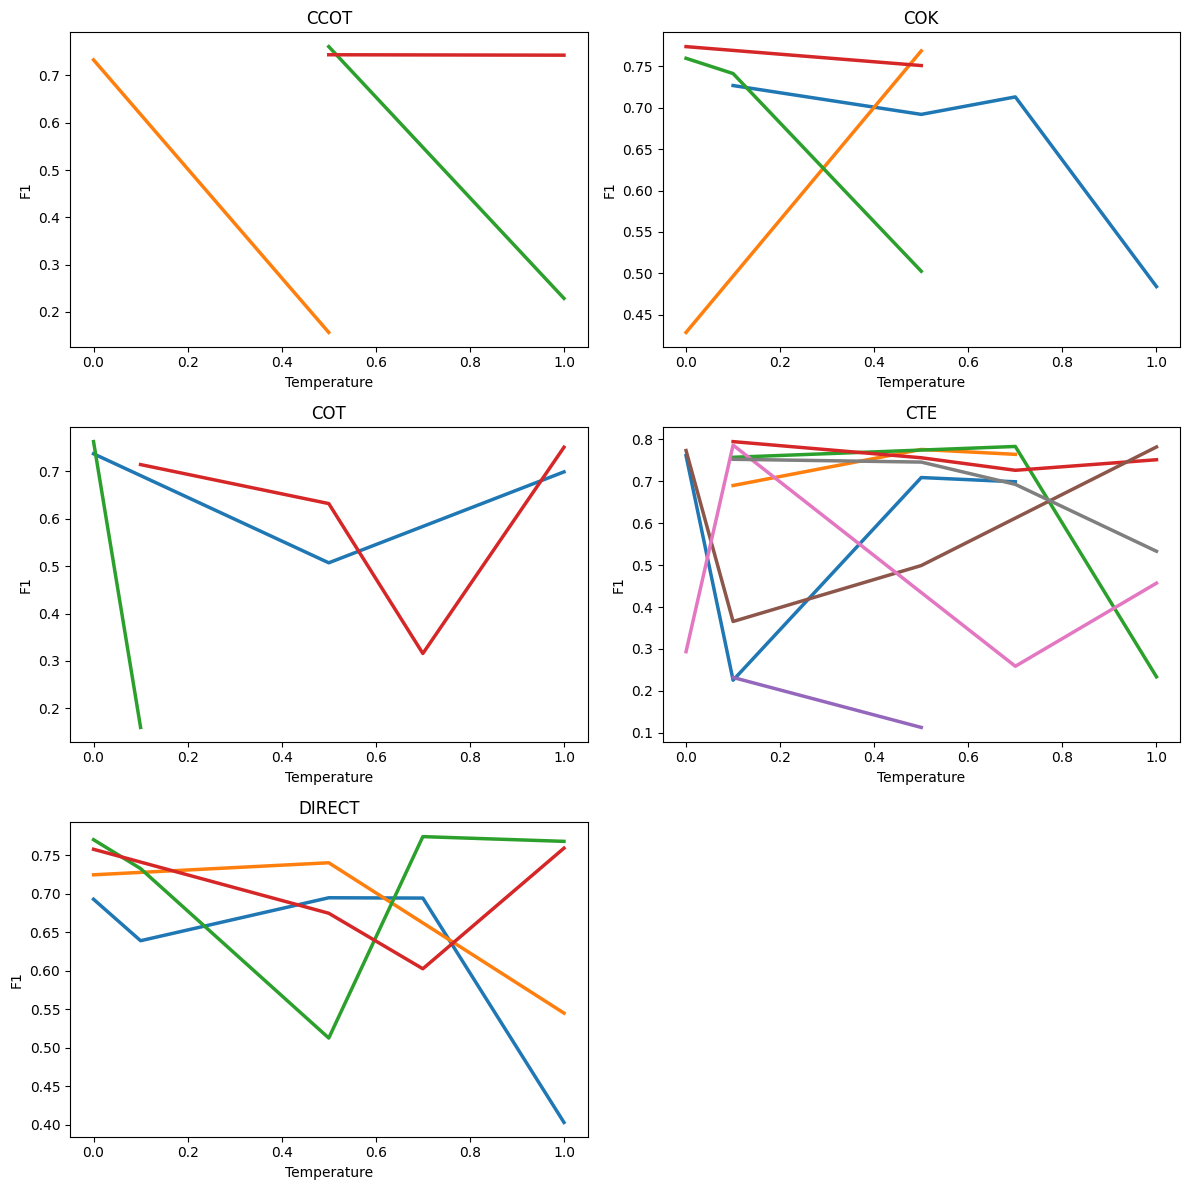

In [ ]:
plot_variance_grid(prepared_df, x='temperature', y='f1', hue='prompt', legend_loc='upper left')

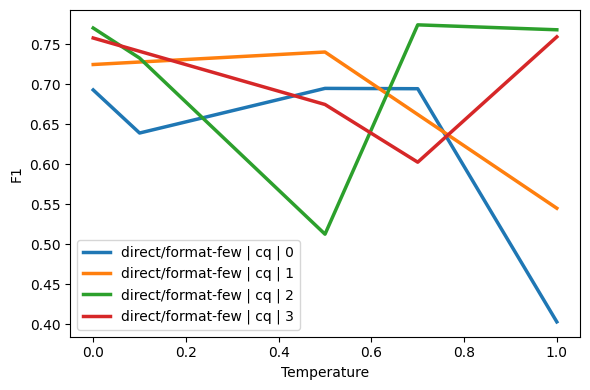

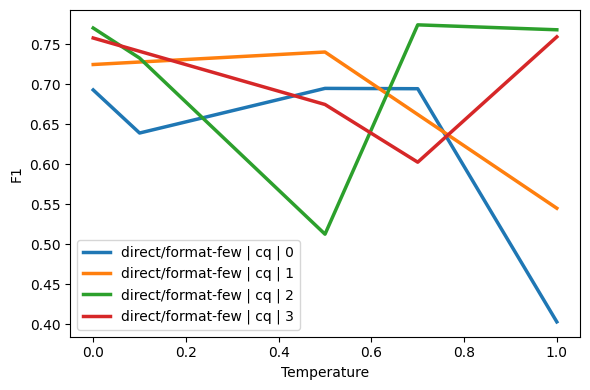

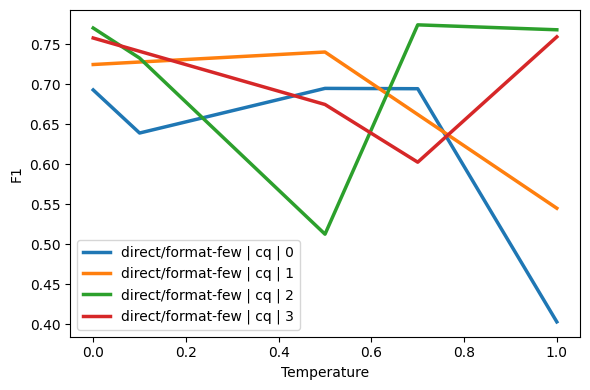

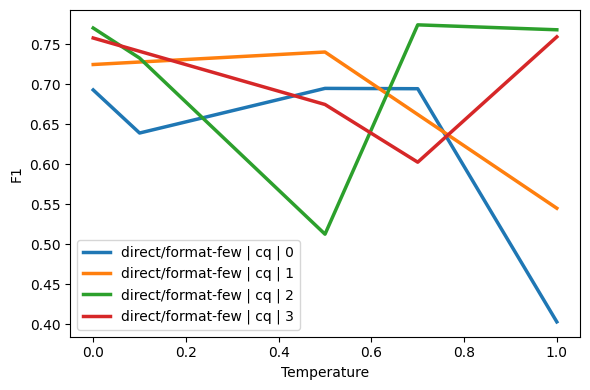

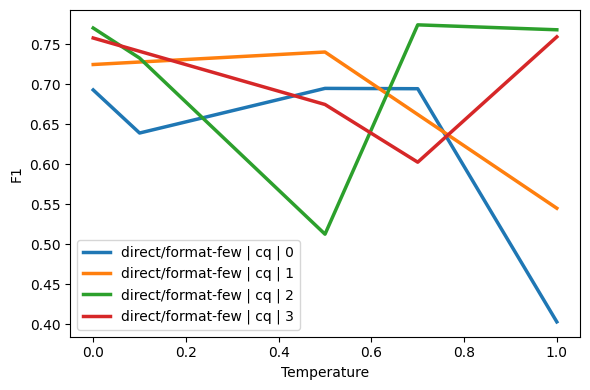

In [ ]:
for technique in prepared_df['technique'].unique():
    plot_variance(prepared_df, technique='DIRECT', legend='brief', figsize=(6, 4))

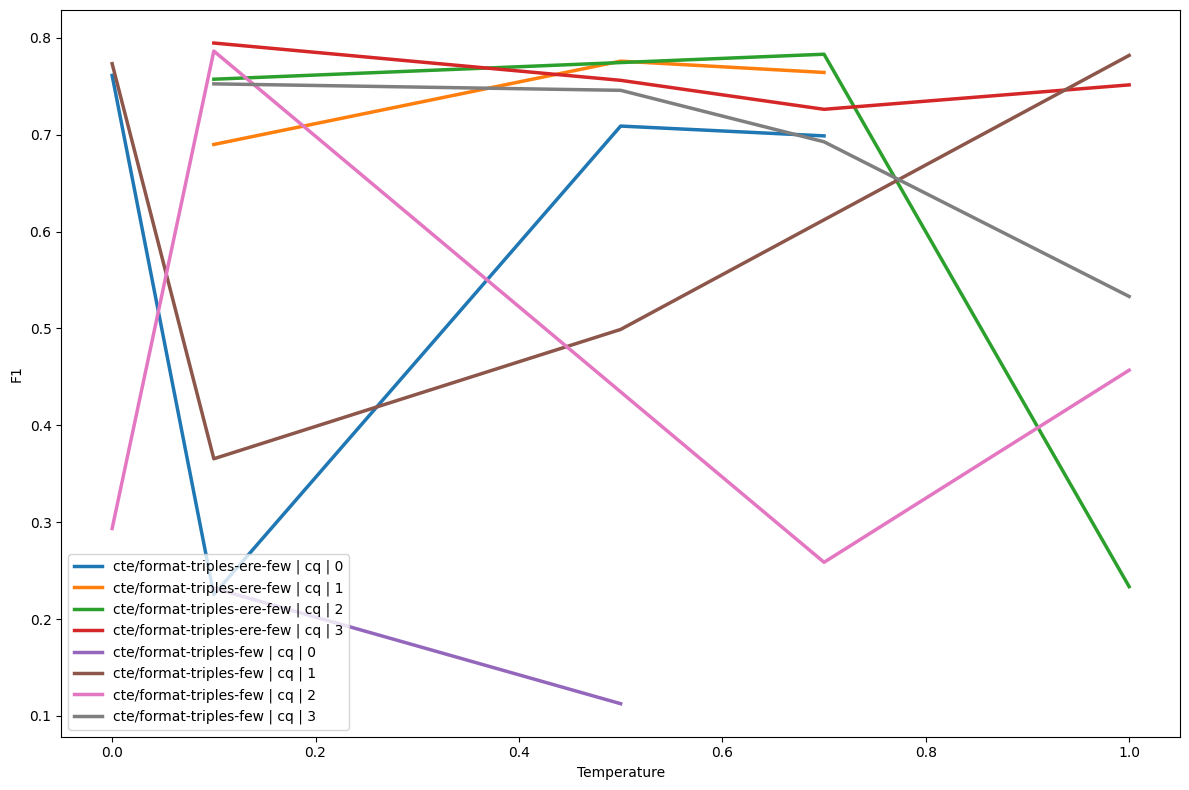

In [ ]:
plot_variance(prepared_df, technique='CTE', legend='brief')

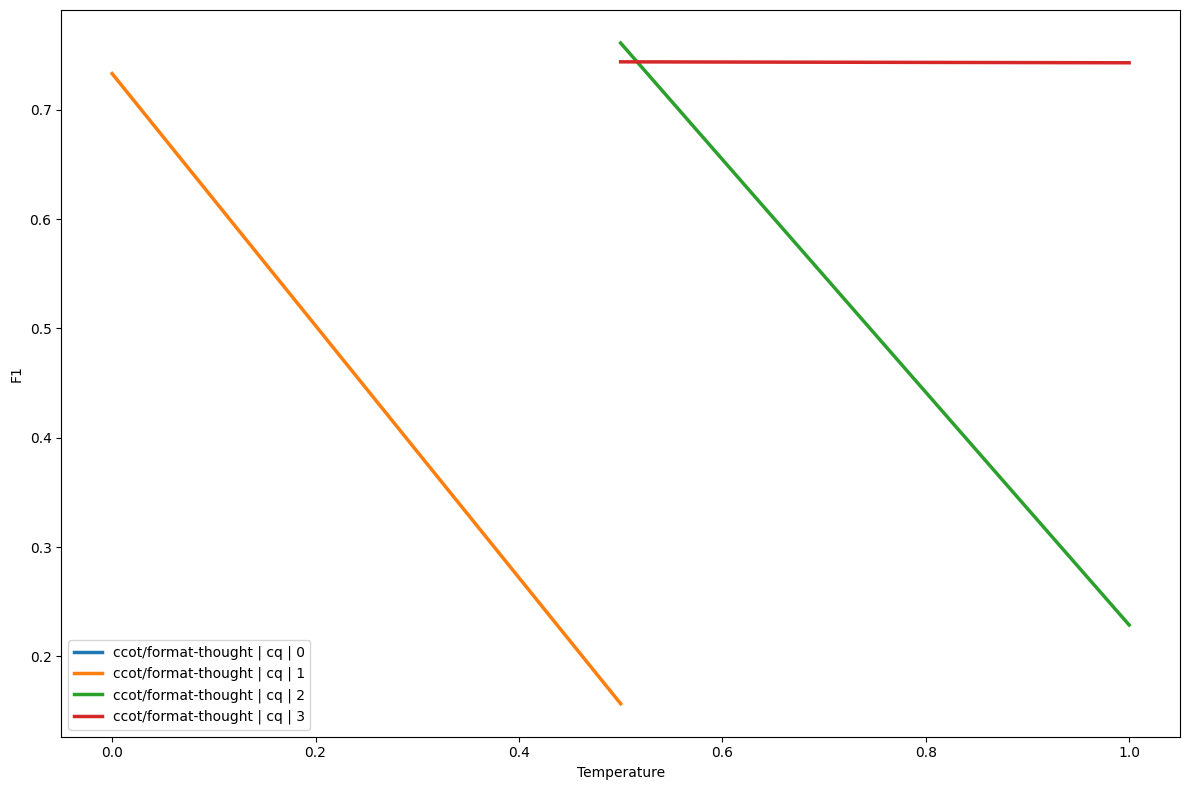

In [ ]:
plot_variance(prepared_df, technique='CCOT', legend='brief')

In [18]:
best_df['params.run'] = 0
best_prompts = prepare_data(best_df).prompt.values.tolist()
_data = prepared_df.copy()
prompt_mask = _data['prompt'].isin(best_prompts)
best_prepared_df = _data.loc[prompt_mask]
best_prepared_df

,technique,system_prompt,user_prompt_template,few_shot_examples,n_shot,n_sc,temperature,run,exact_match,f1,prompt
3,CCOT,ccot/format-thought,cq,semi/ccot,2,1,0.5,1,0.663333,0.760960,ccot/format-thought | cq | 2
4,CCOT,ccot/format-thought,cq,semi/ccot,2,1,1.0,1,0.170000,0.228703,ccot/format-thought | cq | 2
16,COK,cok/adapted,cq,semi/cok,3,1,0.0,1,0.686667,0.773389,cok/adapted | cq | 3
17,COK,cok/adapted,cq,semi/cok,3,1,0.5,1,0.650000,0.750580,cok/adapted | cq | 3
22,COT,cot/format-thought,cq,semi/cot,2,1,0.0,1,0.660000,0.762434,cot/format-thought | cq | 2
23,COT,cot/format-thought,cq,semi/cot,2,1,0.1,1,0.133333,0.159884,cot/format-thought | cq | 2
38,CTE,cte/format-triples-ere-few,cq,semi/cte-triples,3,1,0.1,1,0.703333,0.794636,cte/format-triples-ere-few | cq | 3
39,CTE,cte/format-triples-ere-few,cq,semi/cte-triples,3,1,0.5,1,0.663333,0.756130,cte/format-triples-ere-few | cq | 3
40,CTE,cte/format-triples-ere-few,cq,semi/cte-triples,3,1,0.7,1,0.626667,0.726218,cte/format-triples-ere-few | cq | 3
41,CTE,cte/format-triples-ere-few,cq,semi/cte-triples,3,1,1.0,1,0.670000,0.751426,cte/format-triples-ere-few | cq | 3


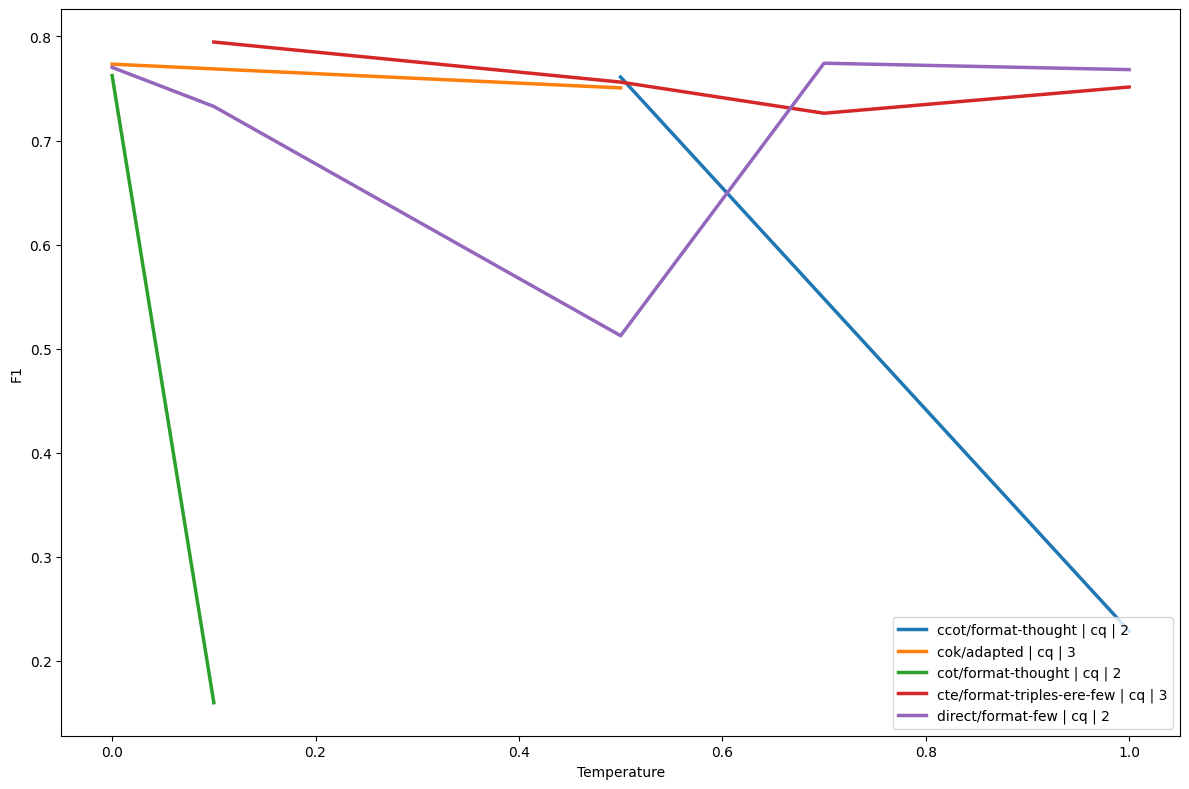

In [ ]:
plot_variance(best_prepared_df, figsize=(12, 8), legend_loc='lower right')

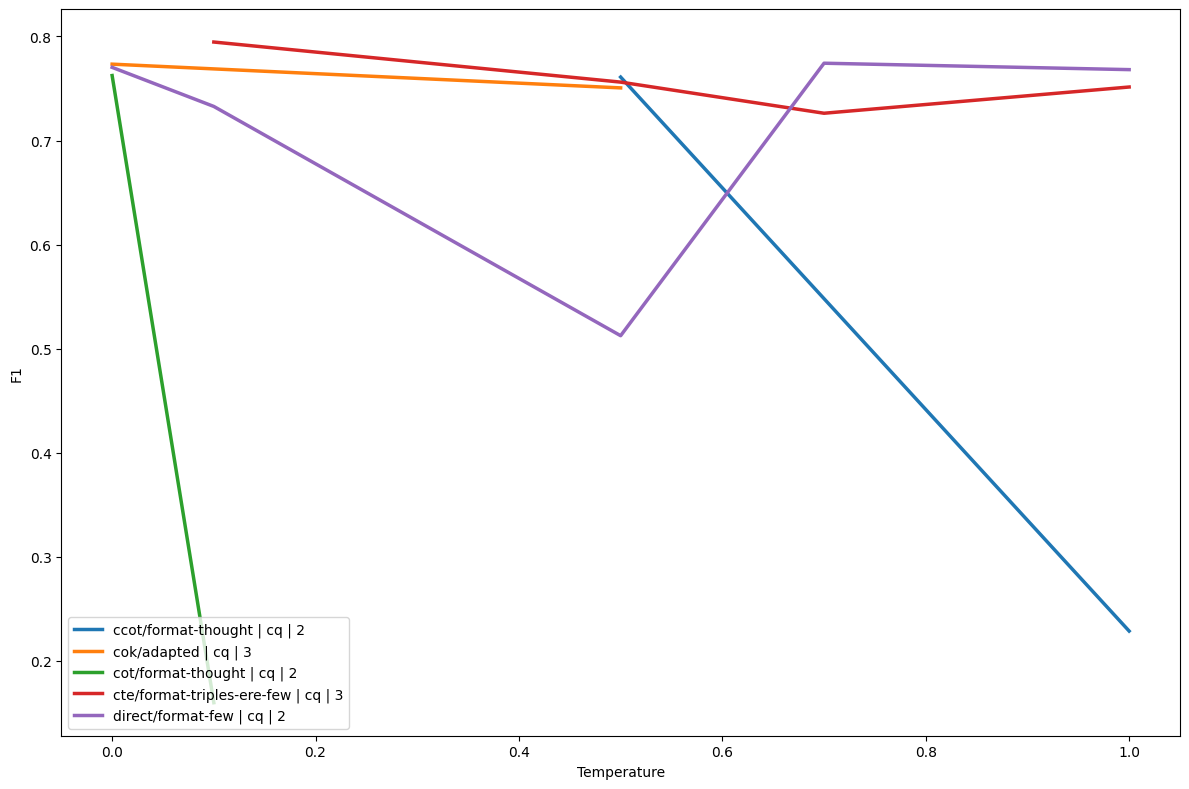

In [ ]:
plot_variance(best_prepared_df, figsize=(12, 8), legend_loc='lower left')

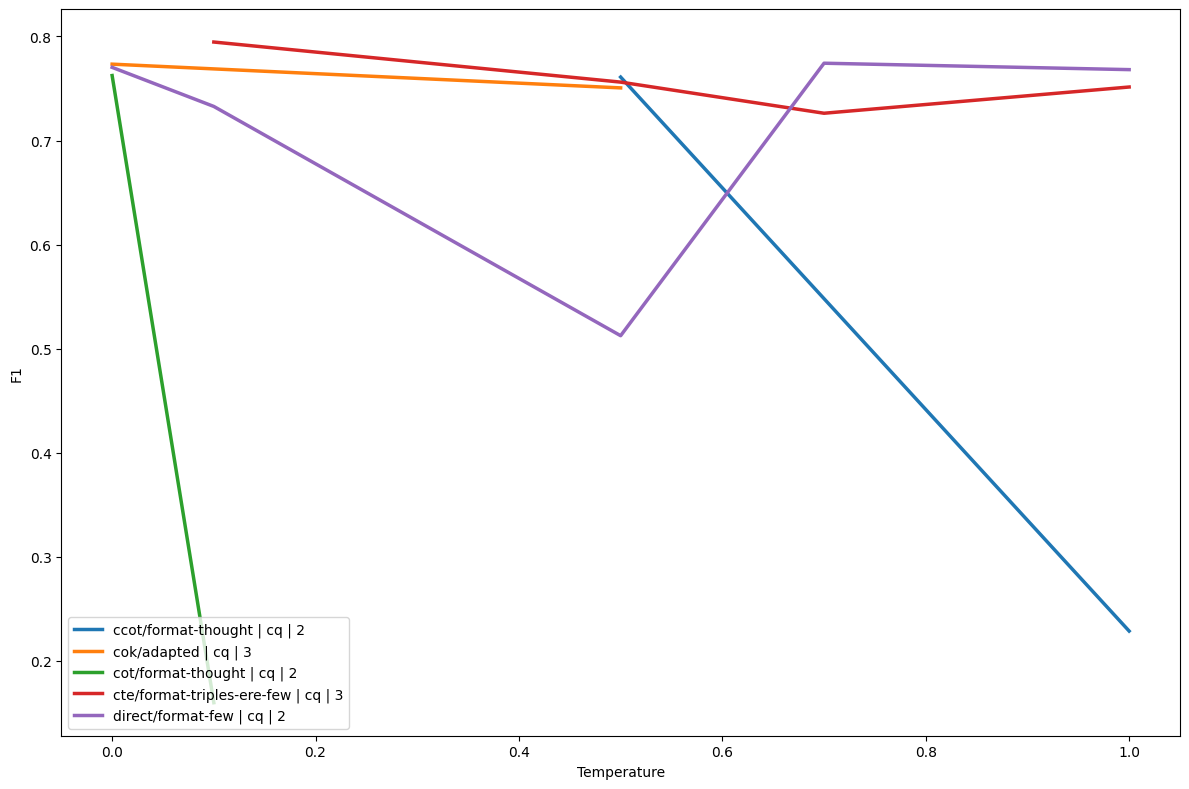

In [ ]:
plot_variance(best_prepared_df[best_prepared_df['temperature'] <= 1.0], figsize=(12, 8), legend_loc='lower left')

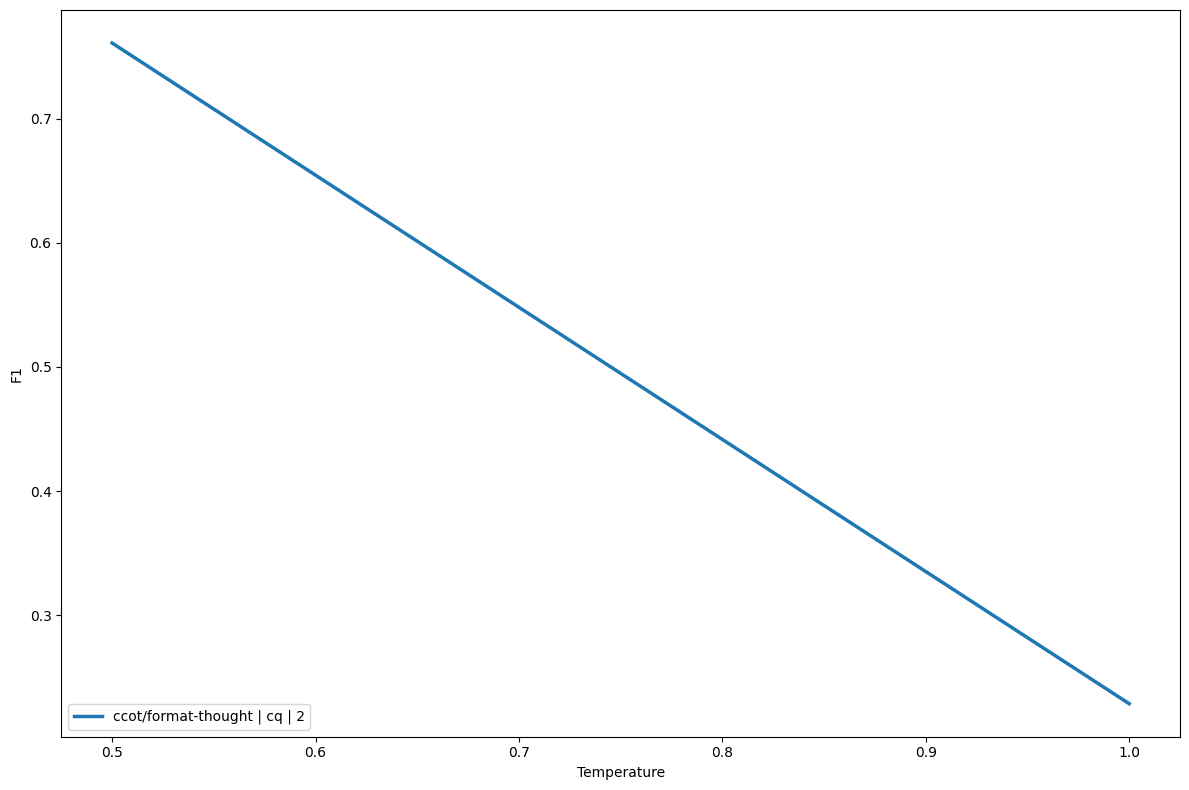

In [ ]:
plot_variance(best_prepared_df[best_prepared_df['temperature'] <= 1.0], technique='CCOT', figsize=(12, 8), legend_loc='lower left')

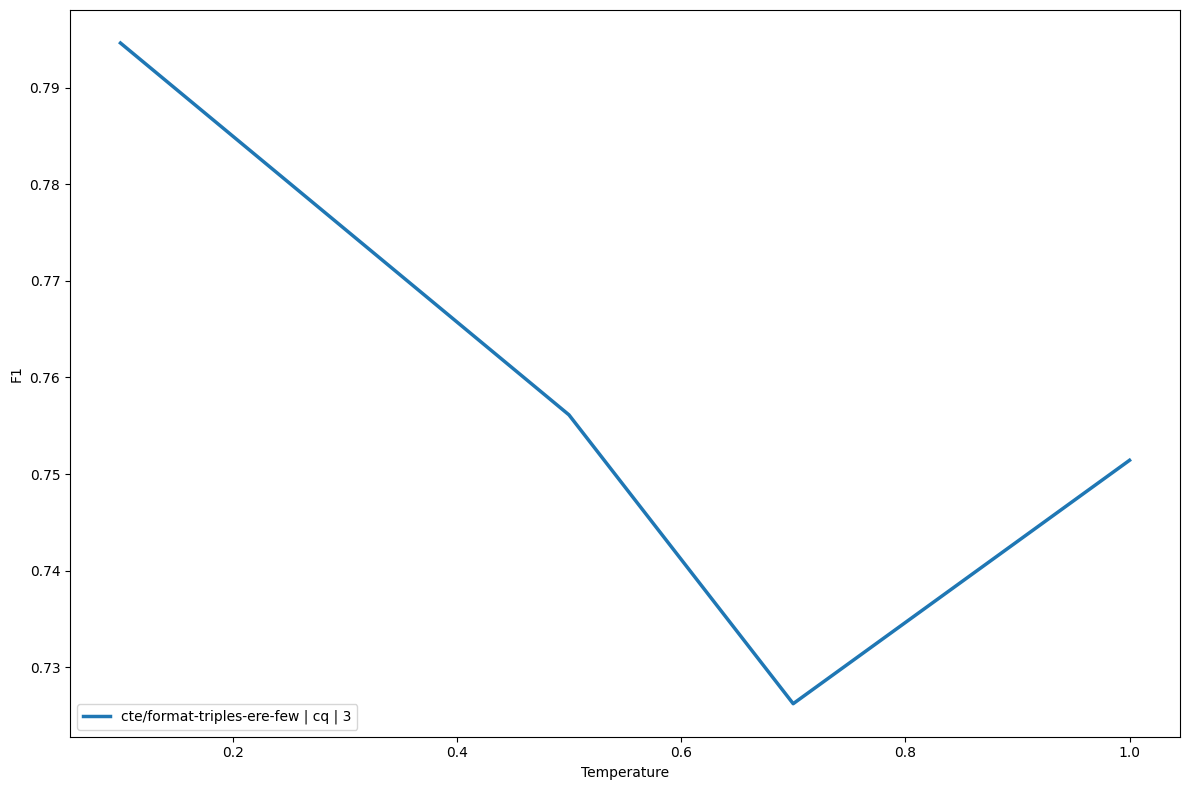

In [ ]:
plot_variance(best_prepared_df[best_prepared_df['temperature'] <= 1.0], technique='CTE', figsize=(12, 8), legend_loc='lower left')

## Inspect

In [24]:
# # box-whisker plot
# plt.figure(figsize=(12, 8))
# sns.boxplot(
#     x="prompt",
#     y="f1",
#     data=prepared_df.sort_values(by="f1"),
# )
# plt.xticks(rotation=60, ha="right");

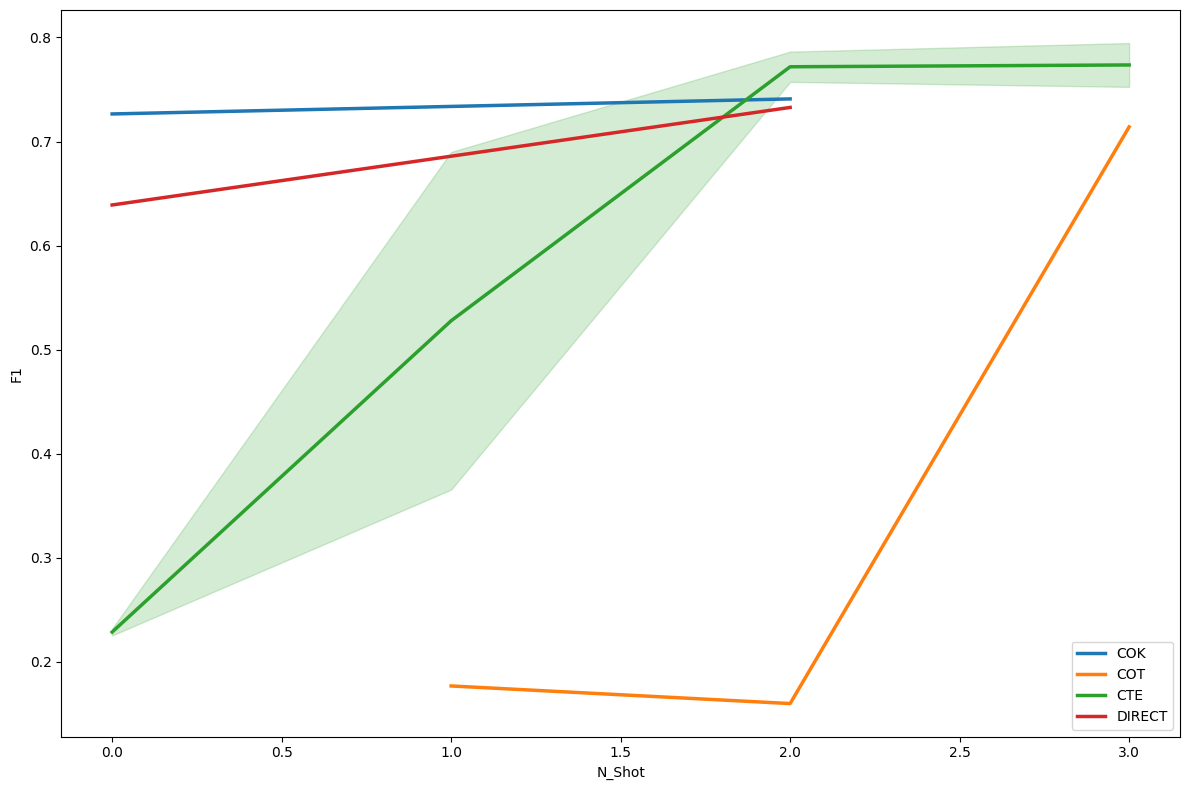

In [ ]:
plot_variance(prepared_df[prepared_df['temperature'] == 0.1], x='n_shot', hue='technique', figsize=(12, 8), legend_loc='lower right')

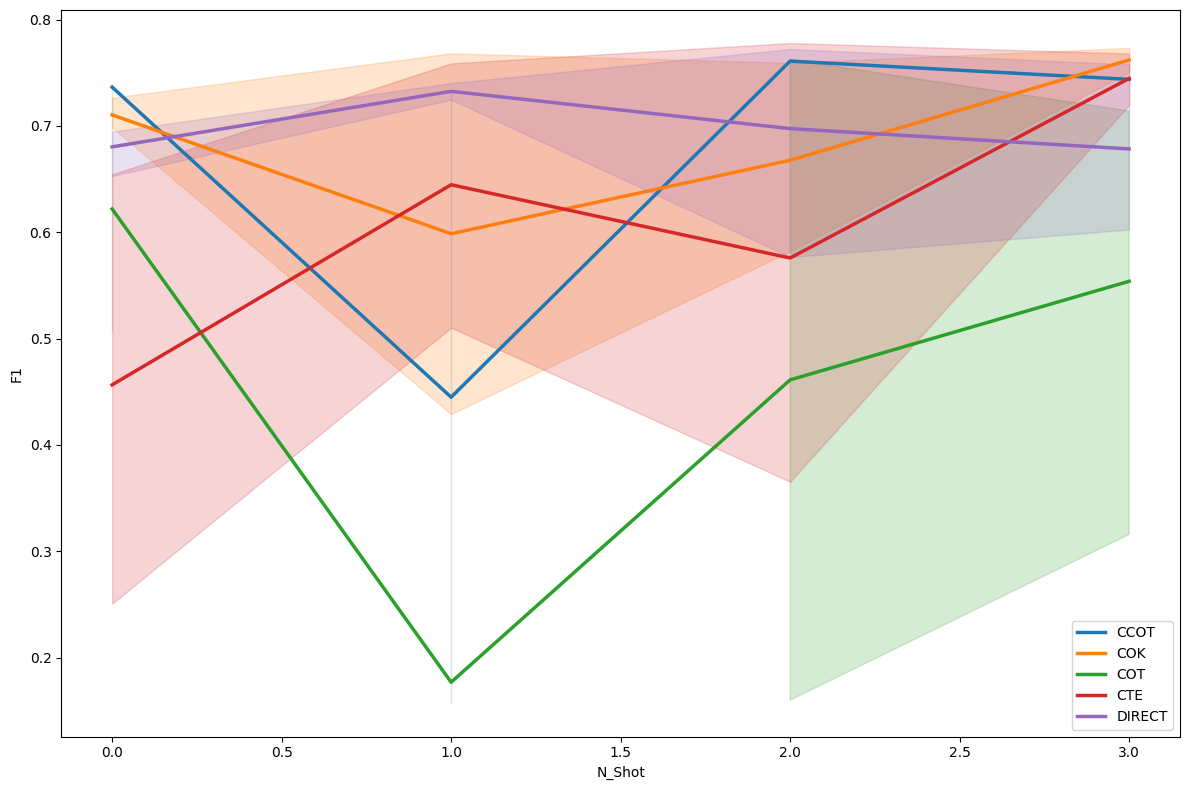

In [ ]:
plot_variance(prepared_df[prepared_df['temperature'] < 1.0], x='n_shot', hue='technique', figsize=(12, 8), legend_loc='lower right')

In [27]:
df

,name,params.qa.temperature,params.qa.system_prompt,params.qa.user_prompt_template,params.qa.few_shot_examples,params.qa.n_shot,params.qa.n_sc,params.run,metrics.exact_match,metrics.f1,...,metrics.gen_token_count.success.max,metrics.gen_token_count.fail.count,metrics.gen_token_count.fail.mean,metrics.gen_token_count.fail.std,metrics.gen_token_count.fail.min,metrics.gen_token_count.fail.25%,metrics.gen_token_count.fail.50%,metrics.gen_token_count.fail.75%,metrics.gen_token_count.fail.max,params.qa.technique
0,blame-dook,0.0,ccot/format-thought,cq,semi/ccot,0,1,1,0.633333,0.736454,...,96,82,49.048780,15.696899,23,39.25,46.5,57.00,97,CCOT
1,jaggy-jynx,0.0,ccot/format-thought,cq,semi/ccot,1,1,1,0.636667,0.732997,...,90,80,49.387500,20.153521,5,37.00,46.5,60.50,100,CCOT
2,stout-iron,0.5,ccot/format-thought,cq,semi/ccot,1,1,1,0.120000,0.156711,...,85,254,30.051181,11.814163,13,24.25,28.0,31.00,93,CCOT
3,fancy-noil,0.5,ccot/format-thought,cq,semi/ccot,2,1,1,0.663333,0.760960,...,89,71,50.985915,18.009912,11,39.00,47.0,61.50,109,CCOT
4,piano-kegs,1.0,ccot/format-thought,cq,semi/ccot,2,1,1,0.170000,0.228703,...,133,237,31.915612,27.211998,1,15.00,24.0,42.00,156,CCOT
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
68,moved-souk,1.0,direct/format-few,cq,semi/direct,2,1,1,0.666667,0.768123,...,11,73,6.684932,4.795474,3,4.00,5.0,8.00,25,DIRECT
69,dolce-axon,0.0,direct/format-few,cq,semi/direct,3,1,1,0.660000,0.757833,...,14,74,7.027027,5.598368,3,4.00,5.0,7.75,33,DIRECT
70,gules-flab,0.5,direct/format-few,cq,semi/direct,3,1,1,0.573333,0.674684,...,15,104,7.009615,7.589588,3,4.00,5.0,6.00,46,DIRECT
71,dosed-noma,0.7,direct/format-few,cq,semi/direct,3,1,1,0.503333,0.602520,...,15,128,6.320312,5.738300,3,4.00,5.0,5.00,33,DIRECT


In [28]:
mask = (df['params.run'] == 2) & (df['params.qa.temperature'] == 0.1)
df.loc[mask].sort_values('metrics.f1', ascending=False)

,name,params.qa.temperature,params.qa.system_prompt,params.qa.user_prompt_template,params.qa.few_shot_examples,params.qa.n_shot,params.qa.n_sc,params.run,metrics.exact_match,metrics.f1,...,metrics.gen_token_count.success.max,metrics.gen_token_count.fail.count,metrics.gen_token_count.fail.mean,metrics.gen_token_count.fail.std,metrics.gen_token_count.fail.min,metrics.gen_token_count.fail.25%,metrics.gen_token_count.fail.50%,metrics.gen_token_count.fail.75%,metrics.gen_token_count.fail.max,params.qa.technique
